In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("../resources/final/Part2_Data.csv")
data.head()

,Customer_ID,Age,Gender,Marital Status,Occupation,Monthly Income,Location,Product_Description,Product_Category,Quantity,Unit_Price,Delivery_Charges,Coupon,Discount_Rate
0,16244,20,M,Single,Student,0,Peoria-Illinois,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,1.0,102.13,6.5,NaN,0.0
1,16244,20,M,Single,Student,0,Peoria-Illinois,Nest Cam Outdoor Security Camera - USA,Nest-USA,1.0,122.77,6.5,NaN,0.0
2,14688,18,M,Single,Student,1,Boise-Idaho,Google Women's Scoop Neck Tee White,Apparel,1.0,6.00,6.0,NaN,0.0
3,14688,18,M,Single,Student,1,Boise-Idaho,Nest Thermostat E - USA,Nest,3.0,99.00,6.5,NaN,0.0
4,14688,18,M,Single,Student,1,Boise-Idaho,25L Classic Rucksack,Backpacks,1.0,103.15,6.5,NaN,0.0


In [30]:
# EDA on Customer Data
print(data.head())
print()
print("Description Of Customer Data")
print(data.describe())
print()
print("Information Of Customer Data")
print(data.info())
print()
missing_values = data.isnull().sum()
print(f"Missing Values: \n{missing_values}")
print()
# finding duplicate values
duplicate_values = data.duplicated().sum()
print(f"Duplicate Values: {duplicate_values}")

   Customer_ID  Age Gender Marital Status Occupation  Monthly Income  \
0        16244   20      M         Single    Student               0   
1        16244   20      M         Single    Student               0   
2        14688   18      M         Single    Student               1   
3        14688   18      M         Single    Student               1   
4        14688   18      M         Single    Student               1   

          Location                            Product_Description  \
0  Peoria-Illinois  Nest Protect Smoke + CO White Wired Alarm-USA   
1  Peoria-Illinois         Nest Cam Outdoor Security Camera - USA   
2      Boise-Idaho            Google Women's Scoop Neck Tee White   
3      Boise-Idaho                        Nest Thermostat E - USA   
4      Boise-Idaho                           25L Classic Rucksack   

  Product_Category  Quantity  Unit_Price  Delivery_Charges Coupon  \
0         Nest-USA       1.0      102.13               6.5    NaN   
1         Nest

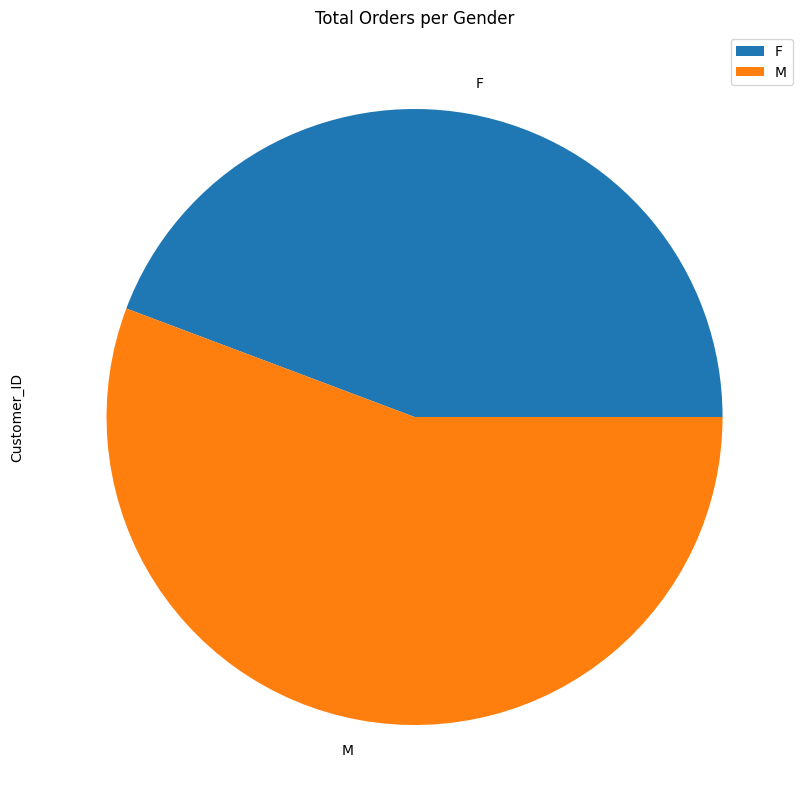

In [31]:
orders_by_gender = data.groupby("Gender")["Customer_ID"].sum()
plt.figure(figsize=(12, 10))
orders_by_gender.plot(kind="pie")
plt.title('Total Orders per Gender')
plt.legend()
plt.show();

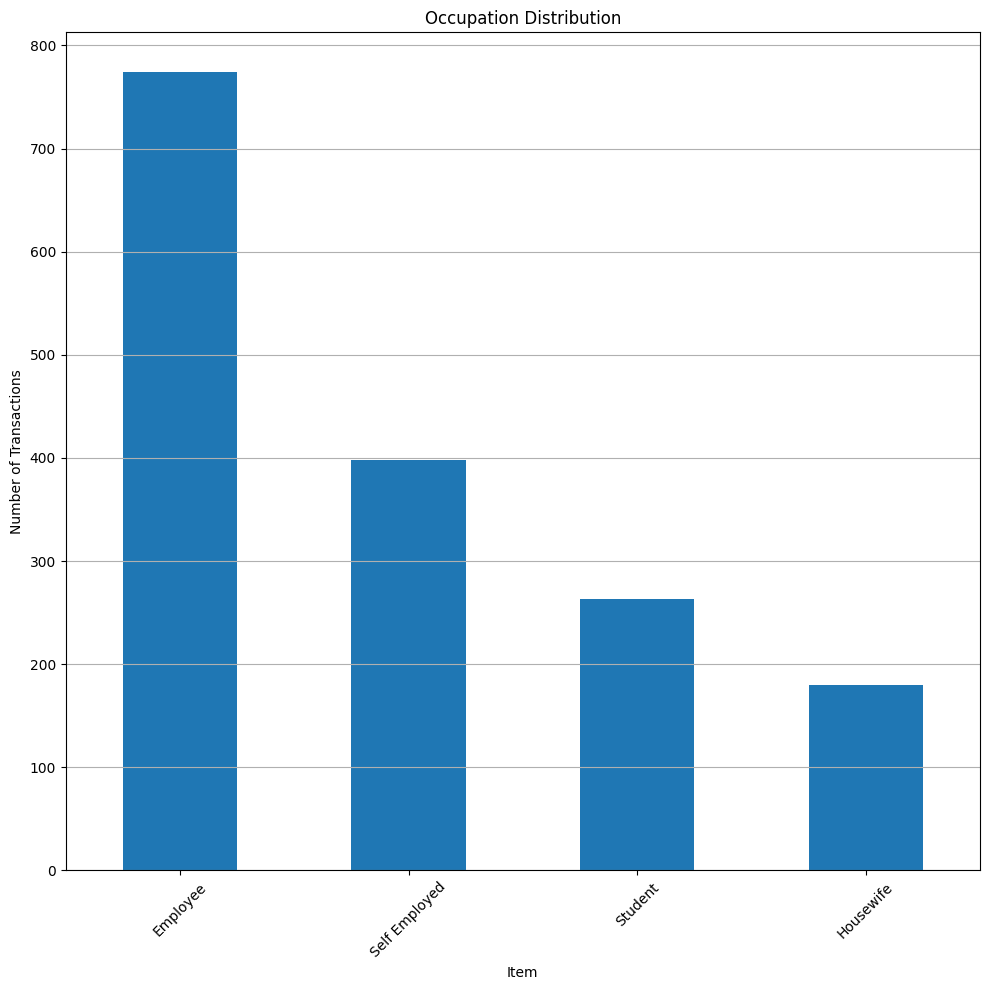

In [32]:
item_stats = data["Occupation"].value_counts()
plt.figure(figsize=(10, 10))
item_stats.sort_values(ascending=False).plot(kind='bar')
plt.title('Occupation Distribution')
plt.xlabel('Item')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

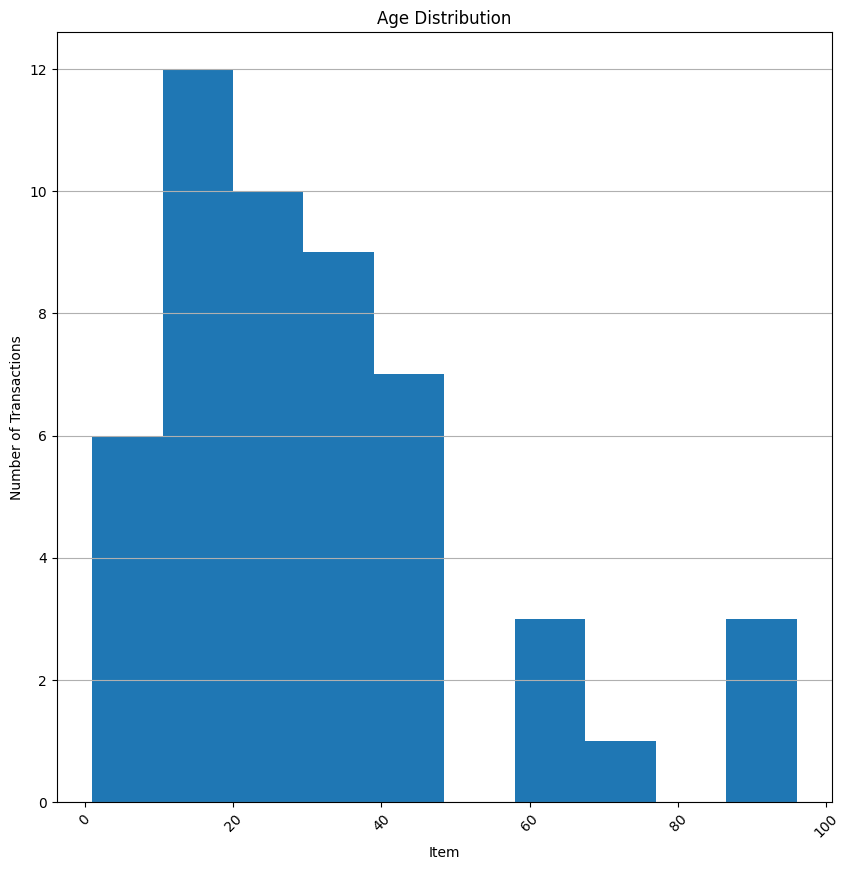

In [33]:
item_stats = data["Age"].value_counts()
plt.figure(figsize=(10, 10))
item_stats.sort_values(ascending=False).plot(kind='hist')
plt.title('Age Distribution')
plt.xlabel('Item')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, )
plt.grid(axis='y')
# plt.tight_layout()
plt.show()

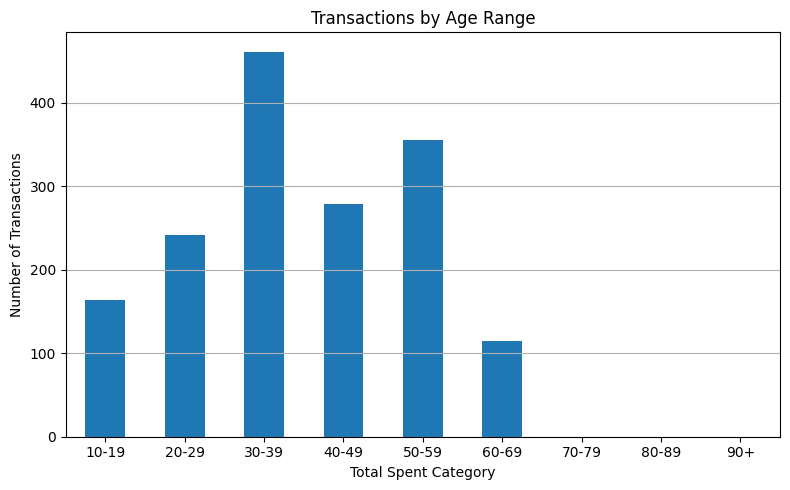

In [34]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

data['Age-range'] = pd.cut(
    data['Age'],
    bins=bins,
    labels=labels,
    right=False
)

category_counts = data['Age-range'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar')
plt.title('Transactions by Age Range')
plt.xlabel('Total Spent Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [35]:
income_map = {0:800, 1:1800, 2:3600, 3:6500, 4:9500}
data["median_monthly_income"] = data["Monthly Income"].apply(lambda x: income_map[x])


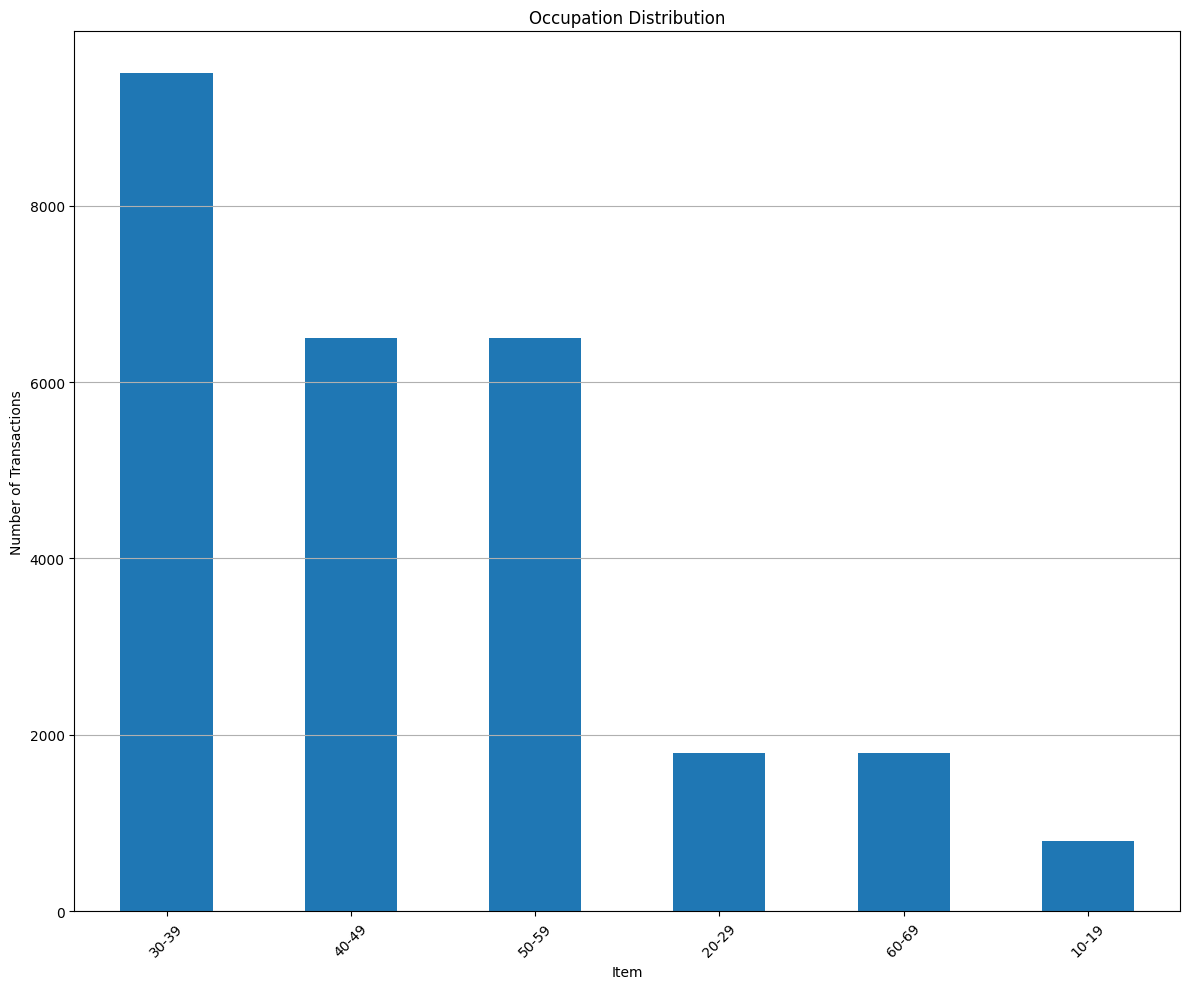

In [40]:
income_by_age = data.groupby("Age-range", observed=True)["median_monthly_income"].median()
plt.figure(figsize=(12, 10))
income_by_age.sort_values(ascending=False).plot(kind='bar')
plt.title('Median Income Distribution')
plt.xlabel('Item')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

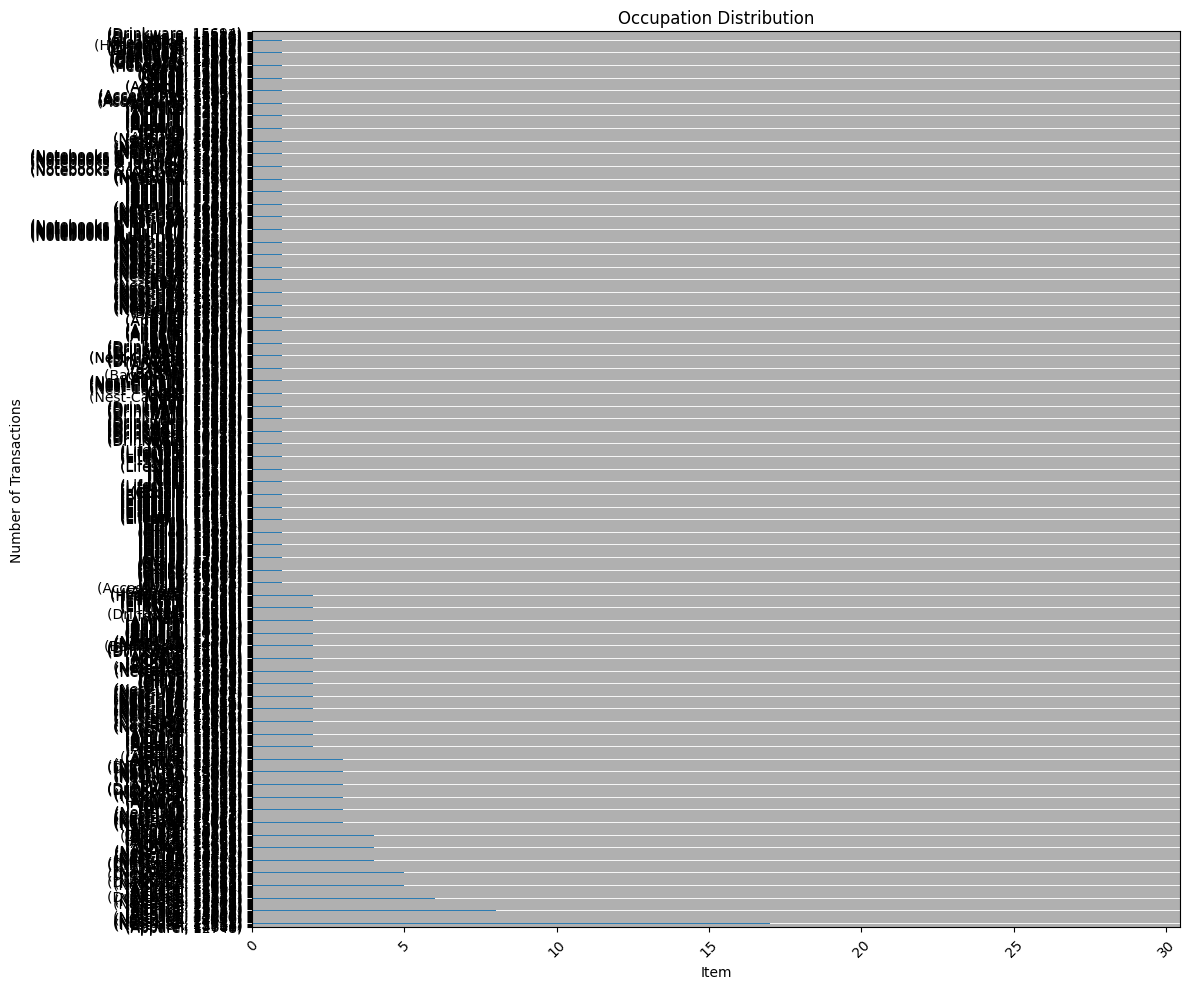

In [45]:
orders_by_category = data.groupby("Product_Category", observed=True)["Customer_ID"].value_counts()
plt.figure(figsize=(12, 10))
orders_by_category.sort_values(ascending=False).plot(kind='barh')
plt.title('Occupation Distribution')
plt.xlabel('Item')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

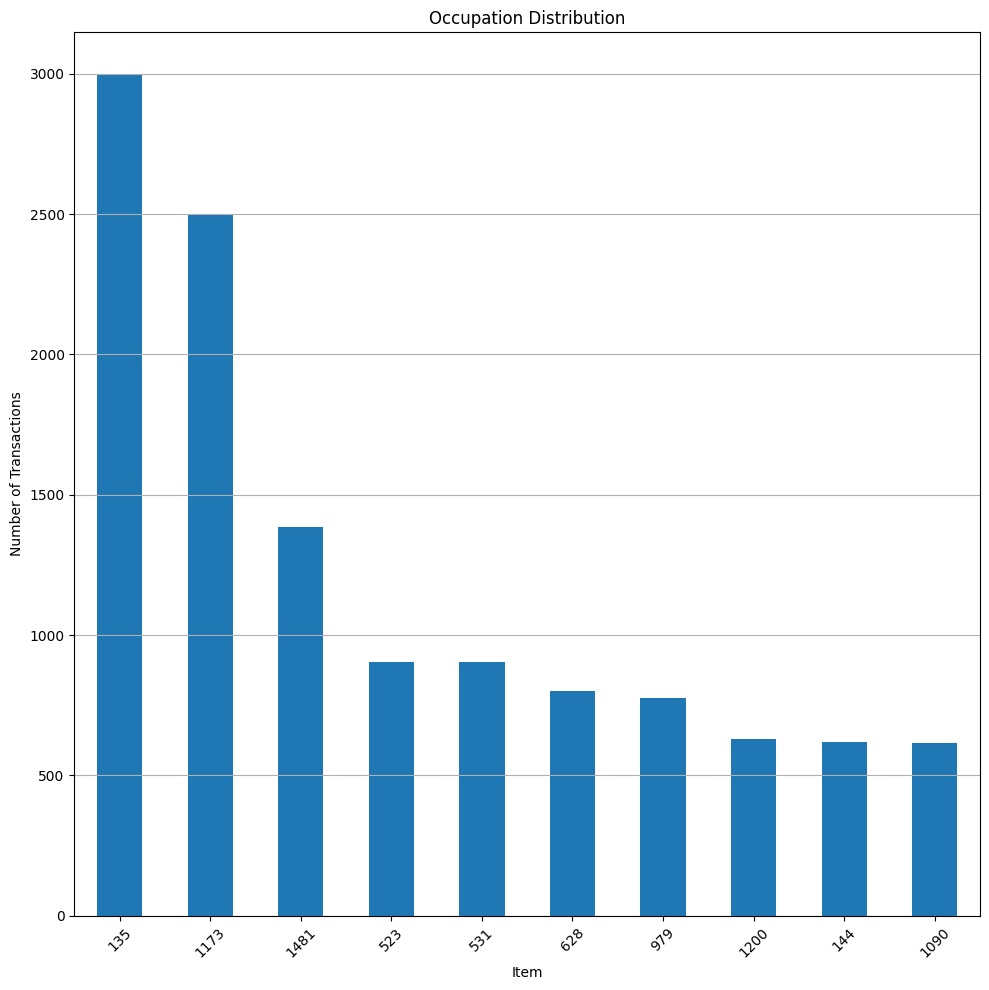

In [46]:
data["Total_Price"] = data["Unit_Price"] * data["Quantity"] + data["Delivery_Charges"]
item_stats = data["Total_Price"]
plt.figure(figsize=(10, 10))
item_stats.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Occupation Distribution')
plt.xlabel('Item')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

ValueError: not enough values to unpack (expected 3, got 2)

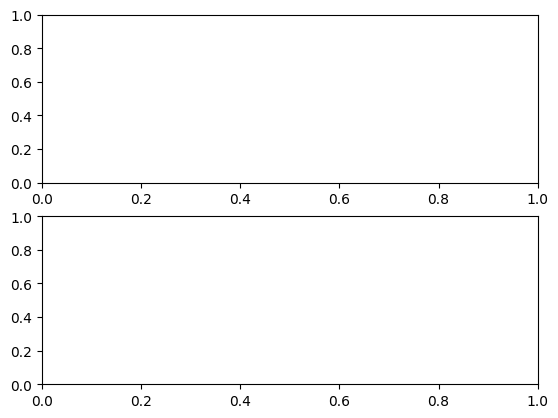

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(2, 1)

# orders_by_gender =
ax1.pie(data.groupby("Gender")["Customer_ID"].sum())

item_stats = data["Occupation"].value_counts()
item_stats.sort_values(ascending=False).plot(kind='bar')
ax2.bar(item_stats)

item_stats = data["Age"].value_counts()
item_stats.sort_values(ascending=False).plot(kind='hist')
ax3.bar(item_stats)

plt.show();

